<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/MNIST_Practise_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape[0]

60000

In [4]:
x_train=x_train /255.0

In [5]:
y_train=tf.keras.utils.to_categorical(y_train)

In [11]:
model =tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Input((x_train.shape[1],x_train.shape[2]),name ="Input"))
model.add(tf.keras.layers.Flatten(name ="Flat"))
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu, name="Hidden_Layer"))
model.add(tf.keras.layers.Dense(10,tf.keras.activations.softmax,name="Output_Layer"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 784)               0         
                                                                 
 Hidden_Layer (Dense)        (None, 100)               78500     
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["acc"])

In [16]:
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6660 - acc: 0.8318
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - acc: 0.9039
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - acc: 0.9167
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - acc: 0.9247
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2448 - acc: 0.9318
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2266 - acc: 0.9366
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2112 - acc: 0.9411
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1980 - acc: 0.9446
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1861 - acc: 0.9479
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1758 - acc: 0.9508


In [19]:
def predict(num):
  plt.imshow(x_test[num])
  image=x_test[num]
  image=image /255.0
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)

  print(f"Model predicted : {np.argmax(result)} with confidence of {np.round(result.max() *100 ,2)} %")
  print(f"corrrect label is {y_test[num]}")

1/1 [==============================] - 0s 26ms/step
Model predicted : 6 with confidence of 99.7 %
corrrect label is 6


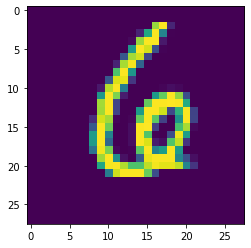

In [20]:
predict(123)